<h2 style='color:purple' align='center'>Training And Testing Available Data</h2>

<p><b>We have a dataset containing prices of used BMW cars. We are going to analyze this dataset
and build a prediction function that can predict a price by taking mileage and age of the car
as input. We will use sklearn train_test_split method to split training and testing dataset</b></p>

In [25]:
import pandas as pd
df = pd.read_csv("carprices.csv")
df.head()

,Mileage,Age(yrs),Sell Price($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

**Car Mileage Vs Sell Price ($)**

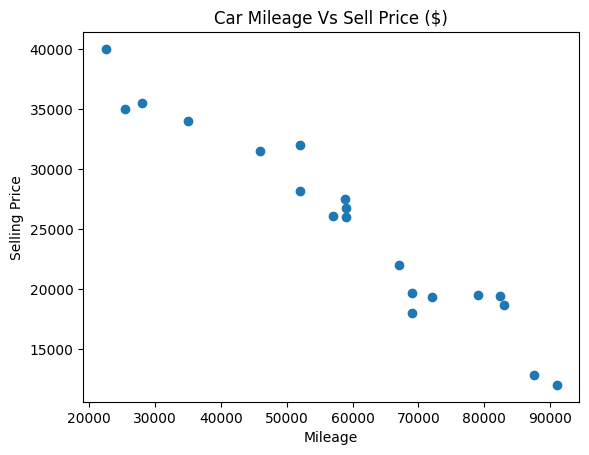

In [6]:
plt.xlabel("Mileage")
plt.ylabel("Selling Price")
plt.title("Car Mileage Vs Sell Price ($)")
plt.scatter(df['Mileage'],df['Sell Price($)'])

In [37]:
df

,Mileage,Age(yrs),Sell Price($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500
5,59000,5,26750
6,52000,5,32000
7,72000,6,19300
8,91000,8,12000
9,67000,6,22000


In [39]:
import plotly.express as px

# Assuming df is your DataFrame and it contains 'Mileage' and 'Sell Price($)' columns
fig = px.scatter(df, x="Mileage", y="Sell Price($)",color='Age(yrs)')
fig.update_layout(title='milage vs sp')
fig.update_traces(marker_size=10)

fig.show()


In [41]:
import plotly.express as px

# Assuming df is your DataFrame and it contains 'Mileage' and 'Sell Price($)' columns
fig = px.scatter(df, x="Age(yrs)", y="Sell Price($)")
fig.update_layout(title="Age vs sp")
fig.update_traces(marker_size=10)

fig.show()

**Car Age Vs Sell Price ($)**

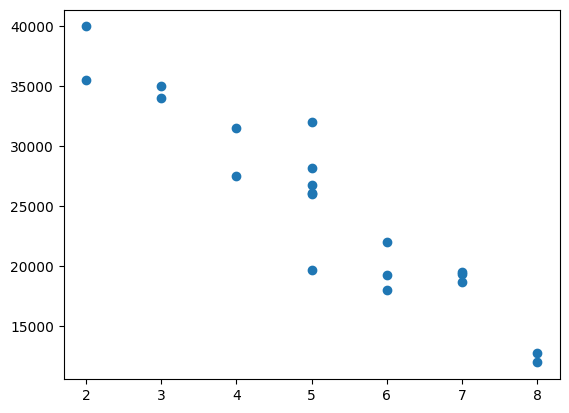

In [42]:
plt.scatter(df['Age(yrs)'],df['Sell Price($)'])

**Looking at above two scatter plots, using linear regression model makes sense as we can clearly see a linear relationship between our dependant (i.e. Sell Price) and independant variables (i.e. car age and car mileage)**

<p style='color:purple'><b>The approach we are going to use here is to split available data in two sets</b></p>
    <ol>
        <b>
        <li>Training: We will train our model on this dataset</li>
        <li>Testing: We will use this subset to make actual predictions using trained model</li>
        </b>
     </ol>
<p style='color:purple'><b>The reason we don't use same training set for testing is because our model has seen those samples before, using same samples for making predictions might give us wrong impression about accuracy of our model. It is like you ask same questions in exam paper as you tought the students in the class.
</b></p>

In [46]:
X = df[['Mileage','Age(yrs)']]
X.head()

,Mileage,Age(yrs)
0,69000,6
1,35000,3
2,57000,5
3,22500,2
4,46000,4


In [47]:
y = df['Sell Price($)']
y.head()

0    18000
1    34000
2    26100
3    40000
4    31500
Name: Sell Price($), dtype: int64

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
print(len(X_train),len(X_test)) 

14 6


In [74]:
X_train.head()

,Mileage,Age(yrs)
7,72000,6
13,58780,4
17,69000,5
3,22500,2
5,59000,5


In [75]:
X_test.head()

,Mileage,Age(yrs)
19,52000,5
10,83000,7
18,87600,8
1,35000,3
9,67000,6


In [76]:
y_train.head()

7     19300
13    27500
17    19700
3     40000
5     26750
Name: Sell Price($), dtype: int64

In [77]:
y_test.head()

19    28200
10    18700
18    12800
1     34000
9     22000
Name: Sell Price($), dtype: int64

**Lets run linear regression model now**

In [78]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression()

In [79]:
X_test

,Mileage,Age(yrs)
19,52000,5
10,83000,7
18,87600,8
1,35000,3
9,67000,6
14,82450,7


In [80]:
clf.predict(X_test)

array([27935.39850813, 16232.5354596 , 14466.79449085, 34390.5856138 ,
       22271.38398182, 16438.69415736])

In [84]:
y_test

19    28200
10    18700
18    12800
1     34000
9     22000
14    19400
Name: Sell Price($), dtype: int64

In [85]:
clf.score(X_test, y_test)

0.936664276753277

: 

**random_state argument**

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)
X_test

,Mileage,Age(yrs)
7,72000,6
10,83000,7
5,59000,5
6,52000,5
3,22500,2
18,87600,8
